<a href="https://colab.research.google.com/github/Inny05/ML-AI/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing the necesary packages
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics, cluster
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.datasets import load_iris

In [28]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data['target']
dict_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['new_target'] = df['target'].map(dict_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,new_target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   new_target         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Prepocessing the data

In [31]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
new_target           0
dtype: int64

Exploratory data analysis


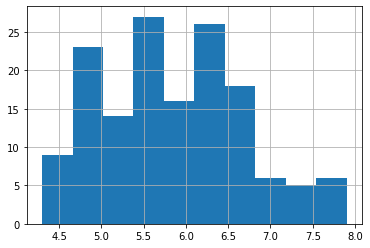

In [32]:
df['sepal length (cm)'].hist()

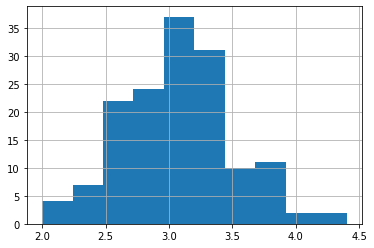

In [33]:
df['sepal width (cm)'].hist()

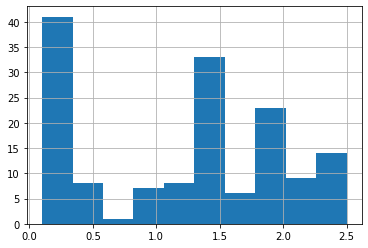

In [34]:
df['petal width (cm)'].hist()

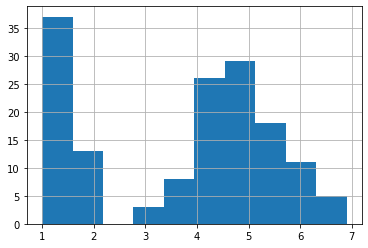

In [35]:
df['petal length (cm)'].hist()

In [37]:
df.drop('new_target', axis = 1, inplace = True)

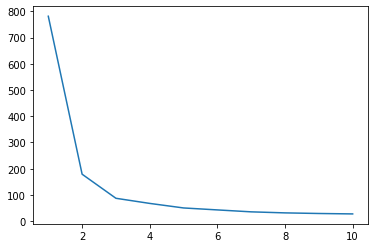

In [38]:
#finding the maximum number of clusters
centriod_list=[]
no_of_clusters = range(1,11)
for i in no_of_clusters:
  kmeans= cluster.KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init=10, random_state= 0)
  kmeans.fit(df.values)
  centriod_list.append(kmeans.inertia_)

plt.plot(no_of_clusters, centriod_list)
plt.show()

In [42]:
#training and prediction 
kmeans= cluster.KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init=10, random_state= 0)
centriod =kmeans.fit_predict(df.values)

In [44]:
print(centriod)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


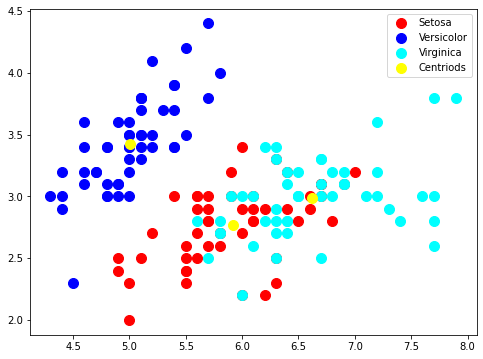

In [50]:
#plotting the predicted values
plt.figure(figsize=(8,6))
plt.scatter(df.values[centriod == 0,0], df.values[centriod == 0,1], s= 100, c= 'red', label = 'Setosa')
plt.scatter(df.values[centriod == 1,0], df.values[centriod == 1,1], s= 100, c= 'blue', label = 'Versicolor')
plt.scatter(df.values[centriod == 2,0], df.values[centriod == 2,1], s= 100, c= 'cyan', label = 'Virginica' )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label = 'Centriods')
plt.legend()